In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(5252)
np.random.seed(5252)

--------------------------------------------------------------------------------------------------------------------------------
###                                      Generation of Data      -         Synthetic Data
--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# parameters of the (latent) gaussians
mus = (np.array([-2., -2.]), np.array([2., 2.]))
covs = (
    np.array([[0.5, 0.],[0., 0.5]]),
    np.array([[0.3, 0.1], [0.1, 0.3]]),
)

In [ ]:
n_features = 2
n_classes = len(mus)
n_samples_per_class = 10000

features = []
labels = []

for i in range(n_classes):
    features.append(
        np.random.multivariate_normal(mean=mus[i], 
                                      cov=covs[i],
                                      size=(n_samples_per_class,))
    )
    labels.append([i]*n_samples_per_class)

In [ ]:
features_orig = np.array(features).reshape(n_classes*n_samples_per_class, n_features)
labels_orig = np.array(labels).reshape(n_classes*n_samples_per_class, 1).squeeze()

### Data Generation 2

In [ ]:
# parameters of the (latent) gaussians
mus = (np.array([-5., -3.]), np.array([5., 3.]))
covs = (
    np.array([[0.1, 0.],[0., 0.8]]),
    np.array([[0.3, 0.3], [0.9, 0.1]]),
)

In [ ]:
n_features = 2
n_classes = len(mus)
n_samples_per_class = 10000

features = []
labels = []

for i in range(n_classes):
    features.append(
        np.random.multivariate_normal(mean=mus[i], 
                                      cov=covs[i],
                                      size=(n_samples_per_class,))
    )
    labels.append([i]*n_samples_per_class)

In [ ]:
features_orig = np.array(features).reshape(n_classes*n_samples_per_class, n_features)
labels_orig = np.array(labels).reshape(n_classes*n_samples_per_class, 1).squeeze()

### Data generated from Lorenzo

In [3]:
n_features = 2
n_classes = 2
n_samples_per_class = 1000

In [4]:
from sklearn.datasets import make_classification
features_orig_1, labels_orig_1 = make_classification(
    n_samples=n_samples_per_class*n_classes//2,
    n_informative=n_features,
    n_features=4,
    flip_y=0.,
    shuffle=False,
    shift=-0.3,
    random_state=5252
)

In [5]:
from sklearn.datasets import make_classification
features_orig_2, labels_orig_2 = make_classification(
    n_samples=n_samples_per_class*n_classes//2,
    n_informative=n_features,
    n_features=4,
    flip_y=0.,
    shuffle=False,
    shift=+0.3,
    random_state=5252
)

In [6]:
features_orig = np.concatenate((features_orig_1, features_orig_2))
labels_orig = np.concatenate((labels_orig_1, labels_orig_2))

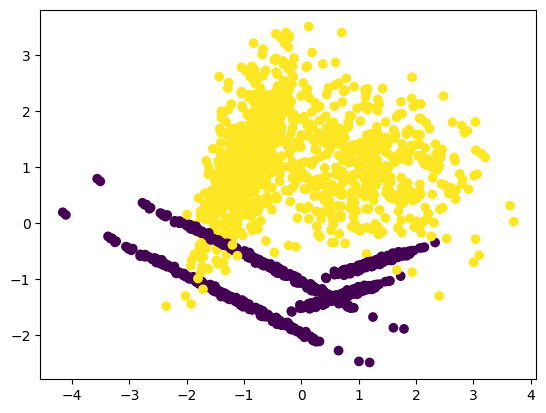

In [7]:
plt.scatter(
    features_orig[:,0], features_orig[:,1], c=labels_orig
)

## View latent dataset

In [ ]:
plt.scatter(
    features_orig[:,0], features_orig[:,1], c=labels_orig
)

In [ ]:
labels_orig.shape

In [ ]:
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    out1 = x*y
    out2 = x + np.exp(-y/10.)
    out3 = (np.log(x*x*y*y) + 10*x*x*y - x)/100.
    return np.stack((out1, out2, out3), axis=-1)

In [ ]:
def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = np.log(x*x*y*y) + 10*x*y*np.sin(x)
    out2 = y - 10*x*y
    out3 = x*y*np.tan(y)
    return np.stack((out1, out2, out3), axis=-1)

In [ ]:
warped_features_1 = warp1(features_orig)
warped_features_2 = warp2(features_orig)

### Function 2

In [ ]:
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    out1 = x**y
    out2 = np.exp(x) + np.exp(-y/10.)
    out3 = (np.log(x**y) - 10*x*x*y - x**y)/100.
    return np.stack((out1, out2, out3), axis=-1)

In [ ]:
def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = np.log(x*x*y*y) + 10*x*np.cos(y)*np.sin(x)
    out2 = np.exp(y) - 10*x*y
    out3 = np.cos(x)*y*np.tan(y)
    return np.stack((out1, out2, out3), axis=-1)

## Functions Created by lorenzo

In [ ]:

# Difficult warp functions
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    out1 = x*y
    out2 = x + np.exp(-y/10.)
    out3 = (np.log(x*x*y*y) + 10*x*x*y - x)/100.
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = np.log(x*x*y*y) + 10*x*y*np.sin(x)
    out2 = y - 10*x*y
    out3 = x*y*np.tan(y)
    return np.stack((out1, out2, out3), axis=-1)

In [ ]:
# Other warping 1
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    
    t = 1.5 * np.pi * (1 + 2 * x/x.max())
    out1 = t * np.cos(t)
    out2 = t * np.sin(t)
    out3 = 21 * np.power(y/y.max(), 2)
    
    return np.stack((out1/out1.max(), out2/out2.max(), out3/out3.max()), axis=-1)

def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = y - 5*x*y
    out2 = 10*y*y + a[:,3]
    return np.stack((out1/out1.max(), out2/out2.max(), a[:,2]), axis=-1)

In [ ]:
# Other warping 2
def warp1(a):
    x = a[:,0]
    y = a[:,1]
    
    out1 = x
    out2 = y
    out3 = x+y
    
    return np.stack((out1, out2, out3), axis=-1)

def warp2(a):
    x = a[:,0]
    y = a[:,1]
    out1 = 1e+4*x
    out2 = 1e+4*y
    out3 = 1e+4*(x - y)
    #out4 = 1e+4*(x + y)
    #return np.stack((out1, out2, out3, out4), axis=-1)
    return np.stack((out1, out2, out3), axis=-1)

In [8]:
use_simple_warp_functions = True
# Simpler warp functions 3
if use_simple_warp_functions:
    def warp1(a):
        x = a[:,0]
        y = a[:,1]
        out1 = x + y
        out2 = 10*x
        out3 = y - x
        return np.stack((out1, out2, out3), axis=-1)

    def warp2(a):
        x = a[:,0]
        y = a[:,1]
        out1 = y - 5*x
        out2 = 10*y
        out3 = y + x*x
        return np.stack((out1, out2, out3), axis=-1)

In [ ]:
def warp1(a):
    return a
warp2 = warp1

In [9]:
warped_features_1 = warp1(features_orig)
warped_features_2 = warp2(features_orig)

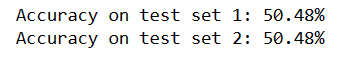

## View dataset for client 1

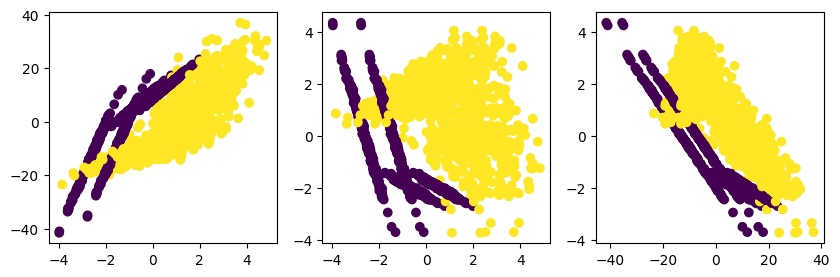

In [10]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].scatter(
    warped_features_1[:,0], warped_features_1[:,1], c=labels_orig
)
ax[1].scatter(
    warped_features_1[:,0], warped_features_1[:,2], c=labels_orig
)
ax[2].scatter(
    warped_features_1[:,1], warped_features_1[:,2], c=labels_orig
)

## View dataset for client 2

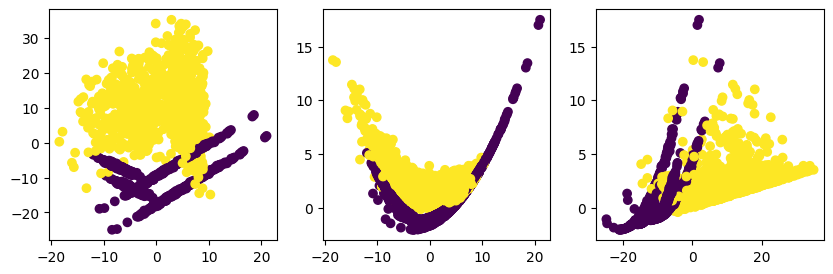

In [11]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].scatter(
    warped_features_2[:,0], warped_features_2[:,1], c=labels_orig
)
ax[1].scatter(
    warped_features_2[:,0], warped_features_2[:,2], c=labels_orig
)
ax[2].scatter(
    warped_features_2[:,1], warped_features_2[:,2], c=labels_orig
)

### Clients

### Preparing the data

In [12]:
X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(torch.tensor(warped_features_1), torch.tensor(labels_orig), test_size=0.2, random_state=42)
X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(torch.tensor(warped_features_2), torch.tensor(labels_orig), test_size=0.2, random_state=42)

In [13]:
X_train_all_C1 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_train_C1)), torch.tensor(np.hstack(y_train_C1)))
X_test_all_C1 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_test_C1)), torch.tensor(np.hstack(y_test_C1)))

In [14]:
X_train_all_C2 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_train_C2)), torch.tensor(np.hstack(y_train_C2)))
X_test_all_C2 = torch.utils.data.TensorDataset(torch.tensor(np.vstack(X_test_C2)), torch.tensor(np.hstack(y_test_C2)))

In [15]:
trainloader_C1= torch.utils.data.DataLoader(X_train_all_C1, batch_size=64, shuffle=True, num_workers=2)
testloader_C1 = torch.utils.data.DataLoader(X_test_all_C1, batch_size=64, shuffle=False, num_workers=2)

In [16]:
trainloader_C2 = torch.utils.data.DataLoader(X_train_all_C2, batch_size=64, shuffle=True, num_workers=2)
testloader_C2 = torch.utils.data.DataLoader(X_test_all_C2, batch_size=64, shuffle=False, num_workers=2)

### Training

### ------------------------------------------------------------------SplitNN---------------------------------------------------------------------------------

In [22]:
class Client():
    def __init__(self):
        self.model = nn.Sequential(nn.Linear(3, 20, dtype=torch.float64),
                                   nn.ReLU(),
                                   nn.Linear(20, 10, dtype=torch.float64),
                                   nn.ReLU())

        self.optimizer = optim.SGD(self.model.parameters(), lr=1e-2)
        self.last_logits = None

    def split_forward(self, batch): 
        self.optimizer.zero_grad()
        self.last_logits = self.model(batch)
        self.last_logits.retain_grad()
        latent_parameters = list(self.model.parameters())
        return self.last_logits.detach()
    
    def split_backward(self, split_grad):
        self.last_logits.backward(split_grad)
        
    def debug_print(self):
        #print('#####################')
        #for name, param in self.model.named_parameters():
            #print(f"{name}")
            #print(f"{param[:1]}")
            #print(f"{param.grad if param.grad is None else param.grad[:1]}")
        #print(f"last logits {self.last_logits[0,0,0,:5]}"
              #f"grad {self.last_logits.grad if self.last_logits.grad is None else self.last_logits.grad[0,0,0,:5]}")
        print('#####################')

In [23]:
client1_Split = Client()
client2_Split = Client()
class Server():
    def __init__(self):
        self.model = nn.Sequential(nn.Linear(10, 8, dtype=torch.float64),
                                   nn.ReLU(),
                                   nn.Linear(8, 5, dtype=torch.float64),
                                   nn.ReLU(),
                                   nn.Linear(5, 3, dtype=torch.float64),
                                   nn.Softmax(dim=1))
        
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=1e-2)
        
        self.split_logits = None
    
    def split_forward(self, split_logits):
        self.optimizer.zero_grad()
        self.split_logits = split_logits
        self.split_logits.requires_grad_(True)
        logits = self.model(self.split_logits)
        return logits
        
    def split_backward(self, loss):
        loss.backward()
        return self.split_logits.grad.detach()

In [24]:
%%time

server = Server()

#print(list(client1_Split.model.parameters())[0][0])
#print(list(client2_Split.model.parameters())[0][0])
#print(list(server.model.parameters())[0][0])
#print('--')

losses_1 = []
losses_2 = []
n_epochs = 250
for i in range(n_epochs):
    epoch_loss_1 = 0.0
    epoch_loss_2 = 0.0
    client1_Split.model.train()
    client2_Split.model.train()
    for i, ((x_c1, y_c1), (x_c2, y_c2)) in enumerate(zip(trainloader_C1, trainloader_C2)):
        #Clients
        client1_logits = client1_Split.split_forward(x_c1)
        ser1_logits =  server.split_forward(client1_logits)
        loss = server.loss_function(ser1_logits, y_c1.long())
        split_grad = server.split_backward(loss)
        client1_Split.split_backward(split_grad)
        server.optimizer.step()
        client1_Split.optimizer.step()
        
        epoch_loss_1 += loss.item()
        
        #print(list(client1_Split.model.parameters())[0][0])
        #print(list(client2_Split.model.parameters())[0][0])
        #print(list(server.model.parameters())[0][0])
        #print('--')
        
        client2_logits = client2_Split.split_forward(x_c2)
        ser2_logits =  server.split_forward(client2_logits)
        loss = server.loss_function(ser2_logits, y_c2.long())
        split_grad = server.split_backward(loss)
        client2_Split.split_backward(split_grad)
        server.optimizer.step()
        client2_Split.optimizer.step()
        
        epoch_loss_2 += loss.item()
        
        #print(list(client1_Split.model.parameters())[0][0])
        #print(list(client2_Split.model.parameters())[0][0])
        #print(list(server.model.parameters())[0][0])
        #print('--')
                
    epoch_loss_1 /= len(trainloader_C1)  # Average losses
    epoch_loss_2 /= len(trainloader_C2)
    
    losses_1.append(epoch_loss_1)  # Append to the list of losses
    losses_2.append(epoch_loss_2)
    


CPU times: user 1min 13s, sys: 6min, total: 7min 13s
Wall time: 4min 29s


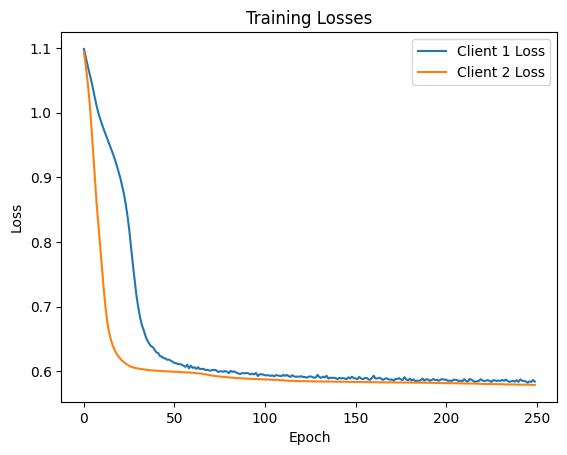

In [25]:
# Plotting the losses
plt.plot(losses_1, label='Client 1 Loss')
plt.plot(losses_2, label='Client 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()

In [26]:
total_accuracy_1 = 0.0
total_samples_1 = 0
total_accuracy_2 = 0.0
total_samples_2 = 0

for i, ((x_c1, y_c1), (x_c2, y_c2)) in enumerate(zip(testloader_C1, testloader_C2)):
    logits_1 = client1_Split.split_forward(x_c1)
    logits_1 = server.split_forward(logits_1)
    _, predictions_1 = torch.max(logits_1, 1)

    logits_2 = client2_Split.split_forward(x_c2)
    logits_2 = server.split_forward(logits_2)
    _, predictions_2 = torch.max(logits_2, 1)
        
    acc_1 = torch.mean((predictions_1 == y_c1).float())
    acc_2 = torch.mean((predictions_2 == y_c2).float())
    
    total_accuracy_1 += acc_1.item() * x_c1.size(0)
    total_samples_1 += x_c1.size(0)
    total_accuracy_2 += acc_2.item() * x_c2.size(0)
    total_samples_2 += x_c2.size(0)

final_accuracy_1 = total_accuracy_1 / total_samples_1
final_accuracy_2 = total_accuracy_2 / total_samples_2
print(f"Accuracy on test set: {final_accuracy_1 * 100:.2f}%")
print(f"Accuracy on test set: {final_accuracy_2 * 100:.2f}%")

Accuracy on test set: 96.75%
Accuracy on test set: 97.75%
